In [2]:
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from scipy.stats import variation, kurtosis, skew

In [11]:
fDir = 'ddists_complete_with_norms/*.pickle'
distances = dict()
for name in glob.glob(fDir):
    yr = name[37:41]
    with open(name, 'rb') as f:
        distances[int(yr)] = pickle.load(f)

In [34]:
def graphCatDist(df, cat, title=None, saveFile=None):
    plt.hist(df[cat], bins=50, facecolor='grey', edgecolor='black')
    plt.show()
testDF = distances[1920]
testDF.head()

,token,prt,div,jsd,apd,normed_prt,normed_div,normed_apd
0,פושע,1.035807,0.033526,0.174280,0.343580,1.076989,0.002521,0.999831
1,מתון,1.042434,0.049617,0.073525,0.348463,0.975442,0.000879,0.999556
2,פילוסופיה,1.013880,0.024207,0.095037,0.343985,0.988803,0.001403,0.999564
3,מומר,1.025586,0.031867,0.165159,0.369501,0.895340,0.000515,0.999535
4,רכש,1.010220,0.004416,0.091266,0.413802,0.926217,0.000499,0.999406


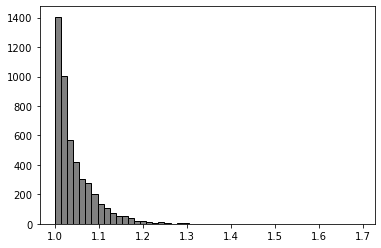

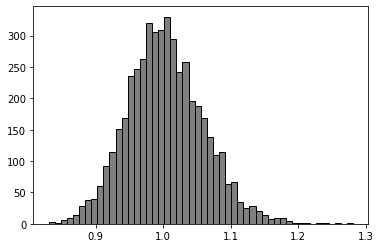

In [35]:
# PRT without normalization does not have a normal distribution
graphCatDist(testDF, 'prt')
# PRT with normalization does have a skew normal distribution
graphCatDist(testDF, 'normed_prt')

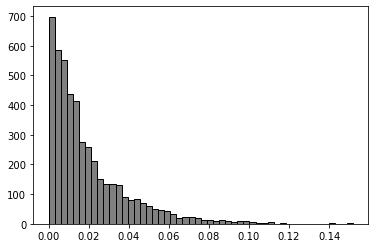

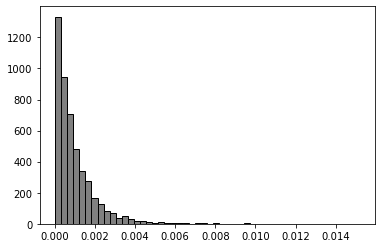

In [39]:
# DIV without normalization does not have a normal distribution
graphCatDist(testDF, 'div')
# Unlike PRT, DIV with normalization also does not have a normal distribution
graphCatDist(testDF, 'normed_div')

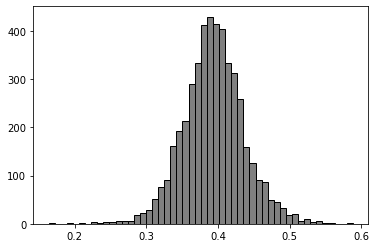

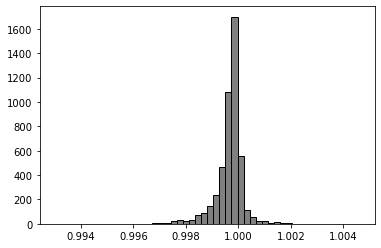

In [43]:
# In the case of APD, both have a skew normal, but kurtosis is more prominent on normed APD.
graphCatDist(testDF, 'apd')
graphCatDist(testDF, 'normed_apd')